In [3]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("labeled_data.csv")
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [6]:
tweet = df["tweet"]

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
vectorizer = CountVectorizer(min_df=20)

In [9]:
x = vectorizer.fit_transform(tweet)

In [10]:
x = x.toarray()

In [14]:
x = x.astype("float32")

In [13]:
labels = df["class"]
t = labels.astype("int32")
np.unique(t)

array([0, 1, 2], dtype=int32)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.7, random_state=0)

In [16]:
import tensorflow as tf

In [17]:
_, n_input = x_train.shape

In [18]:
n_output = len(np.unique(t_test))

In [19]:
from tensorflow.keras import models, layers

In [23]:
total = len(df)
class_weight = {
    0: total/len(df[df["class"] == 0]),
    1: total/len(df[df["class"] == 1]),
    2: total/len(df[df["class"] == 2]),
}

In [24]:
model = models.Sequential([
    layers.Dense(200, input_shape=(n_input, ), activation="relu"),
    layers.Dense(n_output, activation="softmax")
])

optimizer = tf.keras.optimizers.SGD(lr=0.01)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

In [25]:
history = model.fit(
    x_train,
    t_train,
    batch_size=128,
    epochs=40,
    verbose=1,
    validation_data=(x_test, t_test),
    class_weight=class_weight
)

Epoch 1/40
136/136 [==============================] - 11s 78ms/step - loss: 3.1855 - accuracy: 0.4596 - val_loss: 0.9959 - val_accuracy: 0.6582
Epoch 2/40
136/136 [==============================] - 31s 231ms/step - loss: 2.9119 - accuracy: 0.6721 - val_loss: 0.9088 - val_accuracy: 0.6812
Epoch 3/40
136/136 [==============================] - 30s 224ms/step - loss: 2.6318 - accuracy: 0.6958 - val_loss: 0.7869 - val_accuracy: 0.7431A: 15s - l - - ETA: 5s - loss: 2.6603 -  - ETA: 3s
Epoch 4/40
136/136 [==============================] - 25s 181ms/step - loss: 2.3811 - accuracy: 0.7431 - val_loss: 0.7417 - val_accuracy: 0.7486
Epoch 5/40
136/136 [==============================] - 22s 159ms/step - loss: 2.1685 - accuracy: 0.7706 - val_loss: 0.6678 - val_accuracy: 0.7878
Epoch 6/40
136/136 [==============================] - 22s 158ms/step - loss: 1.9936 - accuracy: 0.7918 - val_loss: 0.6454 - val_accuracy: 0.7938
Epoch 7/40
136/136 [==============================] - 20s 150ms/step - loss: 1.85

In [26]:
import matplotlib.pyplot as plt

In [30]:
results = pd.DataFrame(history.history)
results.tail(3)

,loss,accuracy,val_loss,val_accuracy
37,0.882964,0.867132,0.441804,0.843040
38,0.871344,0.869322,0.429575,0.848285
39,0.858672,0.871109,0.435944,0.843443


Text(0.5, 0, 'epochs')

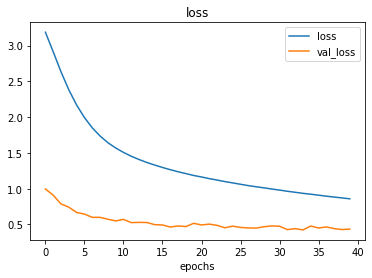

In [31]:
results[["loss", "val_loss"]].plot(title="loss")
plt.xlabel("epochs")

Text(0.5, 0, 'epochs')

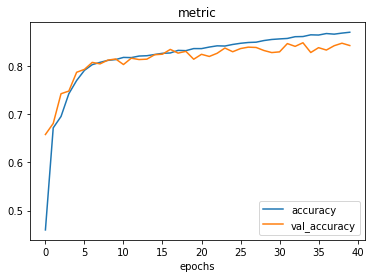

In [32]:
results[["accuracy", "val_accuracy"]].plot(title="metric")
plt.xlabel("epochs")